In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calibration

### Import datasets

In [3]:
# New data for each of the times
muondf_25 = pd.read_csv('muon2.5.csv', delimiter=',')
muondf_50 = pd.read_csv('muon5.csv', delimiter=',')
muondf_75 = pd.read_csv('muon7.5.csv', delimiter=',')
muondf_100 = pd.read_csv('muon10.csv', delimiter=',')
muondf_125 = pd.read_csv('muon12.5.csv', delimiter=',')
muondf_150 = pd.read_csv('muon15.csv', delimiter=',')
muondf_175 = pd.read_csv('muon17.5.csv', delimiter=',')
muondf_200 = pd.read_csv('muon20.csv', delimiter=',')

# array of all
muon_dfs_all = [muondf_25, muondf_50, muondf_75, muondf_100, muondf_125, muondf_150, muondf_175, muondf_200]

muondf_175.head()

,40000,1666607549
0,40000,1666607550
1,17380,1666607550
2,17400,1666607550
3,17440,1666607550
4,17380,1666607551


In [4]:
muondf = pd.read_csv('muon_data.csv', delimiter=' ')
muondf.head()

,40000,1666611857
0,40000,1666611858
1,560,1666611858
2,260,1666611858
3,560,1666611858
4,900,1666611858


### Clean data

Drop values above 40,000 - attributed to lack of second pulse - so no muon lifetime measured in these cases.

In [5]:
# drop values above 40k for lifetime in all:
for i in range(len(muon_dfs_all)):
    muon_dfs_all[i].head()
    muon_dfs_all[i].columns=['Muon Lifetime (ns)', 'Time since beginning (ns)']
    muon_dfs_all[i].drop(muon_dfs_all[i].index[muon_dfs_all[i]['Muon Lifetime (ns)'] >= 40000], inplace=True)

    

Calculate the mean lifetimes for each set of data. (Mean FPGA Timer readings)

In [6]:
# Calculate the mean lifetimes
means =[]
stdevs = []

for i in range(len(muon_dfs_all)):
    this_mean = muon_dfs_all[i]['Muon Lifetime (ns)'].mean()
    means.append(this_mean)
    
    this_stdev = muon_dfs_all[i]['Muon Lifetime (ns)'].std()
    stdevs.append(this_stdev)
    
    
means = np.array(means)
stdevs = np.array(stdevs)
print(means)
print(stdevs)

    
    

[ 2343.45279118  5019.93048314  7453.71169916  9773.24801107
 12439.7587039  14909.7799511  17411.76511226 19974.0848991 ]
[ 7.77579288  7.6243994   9.48028233 13.88286609 13.82939265 11.18676606
 23.16134535 14.94674715]


### Perform a linear fit

Linear fit on the data using NumPy Polyfit function

In [8]:
# Array
arr = np.array([2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000])
x = np.linspace(0,20000,100)

# poly fit, linear
fit, cov = np.polyfit(arr, means, 1, cov=True)

# Y-vals
y = fit[0] * x + fit[1]
print(fit[0])

# Uncertainties from Covariance Matrix
unc = np.sqrt(np.diag(cov))

# Output
print(f'y = ({fit[0] :.2f}±{unc[0] :.2f})x + ({round(fit[1], -1)}±{round(unc[1], -1)})')







1.0019443492840656
y = (1.00±0.01)x + (-110.0±60.0)


### Plot the data

Note: error bars too small to see
Error values: [ 7.77579288  7.6243994   9.48028233 13.88286609 13.82939265 11.18676606
 23.16134535 14.94674715]
y = (1.00±0.01)x + (-110.0±60.0)


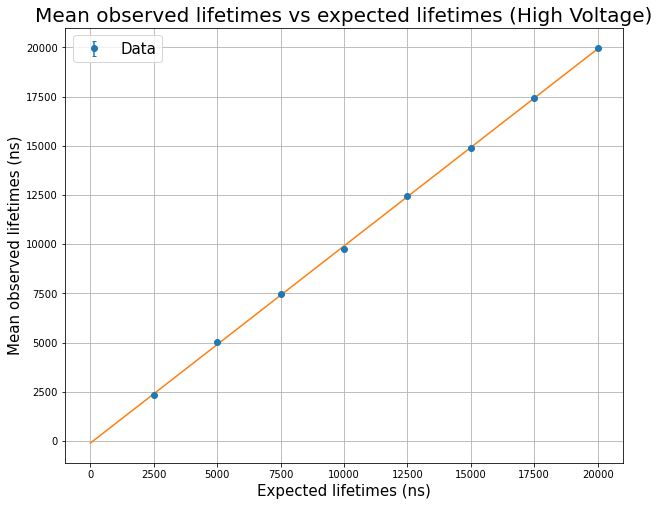

In [9]:
plt.figure(figsize=(10,8))
plt.title('Mean observed lifetimes vs expected lifetimes (High Voltage)', fontsize=20)
plt.errorbar(arr, means, yerr=stdevs, fmt='o', label='Data', capsize=2)
plt.plot(x,y,'-', )
plt.xlabel('Expected lifetimes (ns)', fontsize=15)
plt.ylabel('Mean observed lifetimes (ns)', fontsize=15)
plt.grid()
plt.legend(fontsize=15)

print('Note: error bars too small to see')
print(f'Error values: {stdevs}')
print(f'y = ({fit[0] :.2f}±{unc[0] :.2f})x + ({round(fit[1], -1)}±{round(unc[1], -1)})')


In [11]:
muondf.head()

,40000,1666611857
0,40000,1666611858
1,560,1666611858
2,260,1666611858
3,560,1666611858
4,900,1666611858


### Import the low voltage datasets

In [15]:
# low voltage data

microsec05 = pd.read_table('0.5 microsec.data', delimiter=' ')
microsec10 = pd.read_table('1 microsec.data', delimiter=' ')
microsec15 = pd.read_table('1.5 microsec.data', delimiter=' ')
microsec20 = pd.read_table('2 microsec.data', delimiter=' ')
microsec25 = pd.read_table('2.5 microsec.data', delimiter=' ')
microsec50 = pd.read_table('5 microsec.data', delimiter=' ')
microsec75 = pd.read_table('7.5 microsec.data', delimiter=' ')
microsec100 = pd.read_table('10 microsec.data', delimiter=' ')
microsec125 = pd.read_table('12.5 microsec.data', delimiter=' ')
microsec150 = pd.read_table('15 microsec.data', delimiter=' ')
microsec175 = pd.read_table('17.5 microsec.data', delimiter=' ')
microsec200 = pd.read_table('20 microsec.data', delimiter=' ')

In [16]:
microsec50.head(100)

,40000,1667218154
0,40000,1667218155
1,4860,1667218155
2,4840,1667218155
3,4840,1667218155
4,4840,1667218155
...,...,...
95,4820,1667218156
96,4820,1667218156
97,40099,1667218156
98,4840,1667218156


In [17]:
high_dfs = [microsec05, microsec10, microsec15, microsec20, microsec25, microsec50, microsec75, microsec100, microsec125, microsec150, microsec175, microsec200]

### Function for data cleaning

In [18]:
# drop values above 40k for lifetime in all:

def cleandata1(array_of_dfs):
    
    for i in range(len(array_of_dfs)):
        array_of_dfs[i].head()
        array_of_dfs[i] = array_of_dfs[i]
        array_of_dfs[i].columns=['Muon Lifetime (μs)', 'Time since beginning (μs)']
        array_of_dfs[i].drop(array_of_dfs[i].index[array_of_dfs[i]['Muon Lifetime (μs)'] >= 40000], inplace=True)
        array_of_dfs[i]['Time since beginning (μs)'] = array_of_dfs[i]['Time since beginning (μs)'] 
        array_of_dfs[i]['Muon Lifetime (μs)'] = array_of_dfs[i]['Muon Lifetime (μs)'] / 1000
        
        
        
    return array_of_dfs


def cleandata(df):
    df.head()
    df.columns=['Muon Lifetime (μs)', 'Time since beginning (μs)']
    df.drop(df.index[df['Muon Lifetime (μs)'] >= 40000], inplace=True)
    df['Time since beginning (μs)'] = df['Time since beginning (μs)'] 
    df['Muon Lifetime (μs)'] = df['Muon Lifetime (μs)'] / 1000
    
    return df
    

In [19]:
cleandata1(high_dfs)

[      Muon Lifetime (μs)  Time since beginning (μs)
 1                   0.56                 1667217637
 2                   0.58                 1667217637
 3                   0.58                 1667217637
 4                   0.58                 1667217637
 5                   0.58                 1667217637
 ...                  ...                        ...
 2705                0.56                 1667217664
 2706                0.58                 1667217664
 2707                0.58                 1667217664
 2708                0.58                 1667217664
 2709                0.58                 1667217664
 
 [2682 rows x 2 columns],
       Muon Lifetime (μs)  Time since beginning (μs)
 1                   0.98                 1667217862
 2                   0.98                 1667217862
 3                   1.00                 1667217862
 4                   0.98                 1667217862
 5                   0.98                 1667217862
 ...              

### Calculate averages and standard deviation

Calculate the averages and respective standard deviations of the mean (for use as uncertainty in certain cases e.g. when it is the highest available uncertainty)

In [20]:
def averages_and_stuff(array_of_dfs):
    
    means =[]
    stdevs = []

    for i in range(len(array_of_dfs)):
        this_mean = array_of_dfs[i]['Muon Lifetime (μs)'].mean()
        means.append(this_mean)

        this_stdev = array_of_dfs[i]['Muon Lifetime (μs)'].std()
        stdevs.append(this_stdev)


    means = np.array(means)
    stdevs = np.array(stdevs)
    
    return means, stdevs
    

In [21]:
means_high, stdevs_high = averages_and_stuff(high_dfs)
expected = np.array([500, 1000, 1500, 2000, 2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000])/1000

print(means_high, stdevs_high)

[ 0.5735123   0.99266929  1.50396233  1.94930551  2.49933453  4.8353097
  7.36261119  9.92005071 12.68797991 15.17693375 17.32516312 19.9284887 ] [0.00936464 0.00963889 0.00797305 0.00997765 0.04604611 0.00852598
 0.00703139 0.01282537 0.01014126 0.28156207 0.01781248 0.01071007]


### Linear fit

Perform a linear fit on the data sets. Purpose of this is to check if the FPGA timer is working correctly and is calibrated. Expectation is a perfect linear fit, which would show that there is a direct 1-1 (y = x) relationship between the oscilloscope timer readings and the FPGA timer readings.

In [22]:
x = np.linspace(0,20,100)
# poly fit, linear
fit, cov = np.polyfit(expected, means_high, 1, cov=True)
#print(fit)

y = fit[0] * x + fit[1]

print(fit[0])


print(f'y = ({fit[0] :.2f}±{unc[0] :.2f})x + ({round(fit[1], 2)}±{round(unc[1], 2)})')
unc = np.sqrt(np.diag(cov))


xerror = np.ones(len(expected))*1
yerror = np.ones(len(means_high)) *0.7

root_N = np.sqrt(len(means_high))


0.9994907423339537
y = (1.00±0.01)x + (-0.02±64.31)


Note: error bars too small to see
x-value errors: 0.7 (1 d.p.)
y-value errors: [0.01 0.01 0.01 0.01 0.05 0.01 0.01 0.01 0.01 0.28 0.02 0.01]
y = (1.00±0.01)x + (-0.02±0.06)


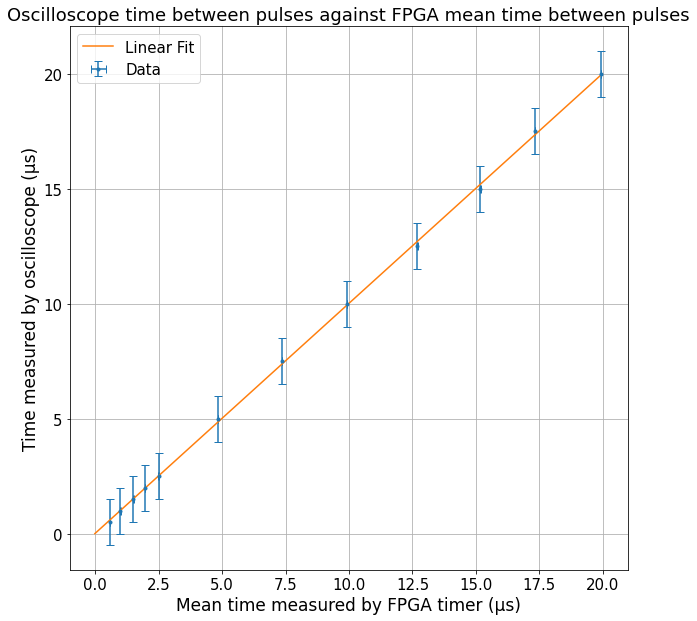

In [80]:
plt.figure(figsize=(10,10))
plt.title('Oscilloscope time between pulses against FPGA mean time between pulses', fontsize=18)
plt.errorbar(y=expected, x=means_high, xerr=0.01,yerr=xerror, fmt='.', label='Data', capsize=4)
plt.plot(y,x,'-', label='Linear Fit')
plt.ylabel('Time measured by oscilloscope (μs)', fontsize=17)
plt.xlabel('Mean time measured by FPGA timer (μs)', fontsize=17)
plt.grid()
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(fontsize=15)

print('Note: error bars too small to see')
print(f'x-value errors: 0.7 (1 d.p.)')
print(f'y-value errors: {np.round(stdevs_high,2)}')
print(f'y = ({fit[0] :.2f}±{unc[0] :.2f})x + ({round(fit[1], 2)}±{round(unc[1], 2)})')

Error bars from the resolution of the oscilloscope timer, propagated accordingly. There was 1 anomalous error bar for the FPGA timer (standard deviation was skewed by a noisy result) - which has since been removed.

### Chi-Squared values

In [23]:
from scipy.stats import chisquare

# Fit
y_here = fit[0] * means_high + fit[1]
print(stdevs_high)

# Chi squared
Chi_sqr = np.sum((y_here - expected)**2/xerror**2)

# Values
print(Chi_sqr)
print(Chi_sqr/2)

[0.00936464 0.00963889 0.00797305 0.00997765 0.04604611 0.00852598
 0.00703139 0.01282537 0.01014126 0.28156207 0.01781248 0.01071007]
0.17796681630767291
0.08898340815383646


# Muon Data Trial Run

In [84]:
muondf_trial1 = pd.read_table('test trial one.data', delimiter=' ')

In [83]:
muondf_trial1

,40000,1667235506
0,40000,1667235507
1,20,1667235507
2,20,1667235508
3,20,1667235508
4,40562,1667235508
...,...,...
335985,40252,1667293925
335986,40000,1667293926
335987,40000,1667293927
335988,40000,1667293928


In [85]:
cleandata(muondf_trial1)

,Muon Lifetime (μs),Time since beginning (μs)
1,0.02,1667235507
2,0.02,1667235508
3,0.02,1667235508
5,0.02,1667235509
6,0.02,1667235509
...,...,...
335978,0.02,1667293923
335980,0.02,1667293924
335981,0.02,1667293924
335983,0.02,1667293924


In [86]:
no_of_counts = muondf_trial1.groupby(['Muon Lifetime (μs)'], sort=False).size()

<BarContainer object of 3 artists>

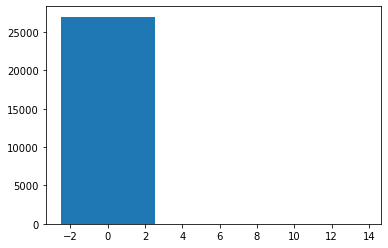

In [64]:
no_of_counts

x = np.array([0.02,0.04,11.32])
y = np.array([27000, 3208, 1])

plt.bar(x, y, width=np.array([5, 5, 5]))

### Plotting Muon Lifetime distribution

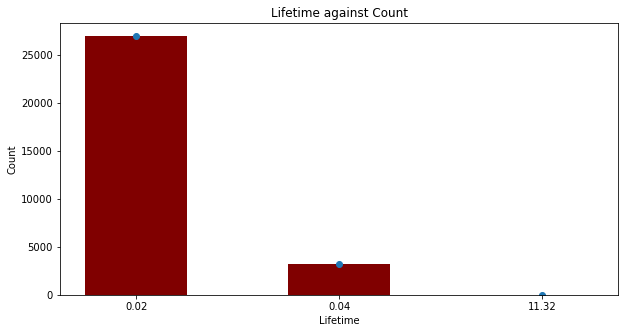

In [90]:
# creating the dataset
data = {'0.02':27000, '0.04':3208, '11.32':1}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.5)
plt.plot(courses, values, 'o')


plt.xlabel("Lifetime")
plt.ylabel("Count")
plt.title("Lifetime against Count")
plt.show()

Above data suggests an error in method - since there are only three bins, indicating full data has not been taken. Repeat readings will be necessary.

In [24]:
from scipy.optimize import curve_fit

def exp_decay(x, a, b, c):
    y = a*np.exp(b*x) + c
    return y

parama, paramb, paramc, cov = curve_fit(exp_decay, x, y, p0=[])

TypeError: exp_decay() missing 3 required positional arguments: 'a', 'b', and 'c'